In [1]:
import os
os.chdir('../../..')

In [2]:
os.listdir()

['LICENSE.md',
 'progun_forum_corpus.txt',
 'convokit',
 '.DS_Store',
 'requirements.txt',
 'progun_corpus.txt',
 'skipped_users.json',
 'Makefile',
 'website',
 'datasets',
 'tests',
 'README.md',
 'setup.py',
 '.gitignore',
 'ldavis_prepared_8',
 'moderate_forum_corpus_full.txt',
 'CONTRIBUTING.md',
 'examples',
 'doc',
 'ldavis_prepared_news_8',
 'antigun_forum_corpus.txt',
 '.git',
 'antigun_corpus.txt',
 'whole_forum_corpus_full.txt',
 '.idea']

In [3]:
from convokit import Corpus, LanguageModel, download

In [4]:
forum_corpus = Corpus(filename="/Users/calebchiam/Documents/GitHub/cs6742-fork/datasets/gun_debate_forum_corpus_full")

In [5]:
forum_corpus.print_summary_stats()

Number of Users: 2010
Number of Utterances: 457973
Number of Conversations: 4104


In [6]:
from collections import defaultdict
leanings = defaultdict(int)
for user in forum_corpus.iter_users():
    if 'lean' in user.meta:
        leanings[user.meta['lean']] += 1 

In [7]:
leanings

defaultdict(int,
            {'Libertarian ': 117,
             'Slightly Conservative ': 49,
             'Progressive ': 77,
             'Undisclosed ': 428,
             'Liberal ': 105,
             'Libertarian - Right ': 83,
             'Conservative ': 215,
             'Very Conservative ': 87,
             'Slightly Liberal ': 56,
             'Independent ': 240,
             'Centrist ': 76,
             'Other ': 182,
             'Socialist ': 50,
             'Libertarian - Left ': 39,
             'Private ': 19,
             'Moderate ': 73,
             'Very Liberal ': 44,
             'Communist ': 9})

In [8]:
sum(leanings.values())

1949

In [9]:
for user in forum_corpus.iter_users():
    if 'lean' in user.meta:
        user.meta['lean'] = user.meta['lean'].strip() # get rid of extra whitespace

In [10]:
# Liberal, Very Liberal, Progressive
# Libertarian - Right, Conservative, Very Conservative
# Independent, Centrist, Moderate

In [11]:
random_user = next(forum_corpus.iter_users())

In [12]:
antigun_users = []
progun_users = []
moderate_users = []
for user in forum_corpus.iter_users():
    lean = user.meta.get('lean', None)
    if lean in {'Liberal', 'Very Liberal', 'Progressive'}:
        antigun_users.append(user)
    elif lean in {'Libertarian - Right', 'Conservative', 'Very Conservative'}:
        progun_users.append(user)
    elif lean in {'Independent', 'Centrist', 'Moderate'}:
        moderate_users.append(user)

In [13]:
len(antigun_users)

226

In [14]:
len(progun_users)

385

In [15]:
len(moderate_users)

389

## Distribution of utterances

In [16]:
import matplotlib.pyplot as plt

In [17]:
num_utts_antigun_users = [len(list(user.iter_utterances())) for user in antigun_users]
num_utts_progun_users = [len(list(user.iter_utterances())) for user in progun_users]
num_utts_moderate_users = [len(list(user.iter_utterances())) for user in moderate_users]

(array([189.,  14.,   8.,   2.,   2.,   4.,   1.,   1.,   2.,   0.,   0.,
          0.,   1.,   0.,   1.,   0.,   0.,   0.,   0.,   1.]),
 array([1.00000e+00, 1.85550e+02, 3.70100e+02, 5.54650e+02, 7.39200e+02,
        9.23750e+02, 1.10830e+03, 1.29285e+03, 1.47740e+03, 1.66195e+03,
        1.84650e+03, 2.03105e+03, 2.21560e+03, 2.40015e+03, 2.58470e+03,
        2.76925e+03, 2.95380e+03, 3.13835e+03, 3.32290e+03, 3.50745e+03,
        3.69200e+03]),
 <a list of 20 Patch objects>)

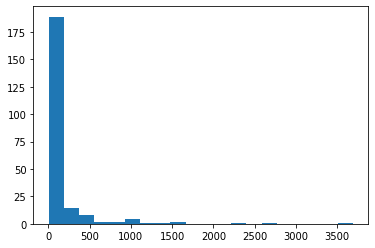

In [67]:
plt.hist(num_utts_antigun_users, bins=20)

Some people say a LOT.

(array([377.,   4.,   3.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([1.000000e+00, 2.697150e+03, 5.393300e+03, 8.089450e+03,
        1.078560e+04, 1.348175e+04, 1.617790e+04, 1.887405e+04,
        2.157020e+04, 2.426635e+04, 2.696250e+04, 2.965865e+04,
        3.235480e+04, 3.505095e+04, 3.774710e+04, 4.044325e+04,
        4.313940e+04, 4.583555e+04, 4.853170e+04, 5.122785e+04,
        5.392400e+04]),
 <a list of 20 Patch objects>)

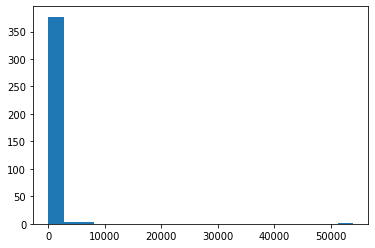

In [68]:
plt.hist(num_utts_progun_users, bins=20) # holy shit that guy at 50000

(array([356.,  13.,   4.,   5.,   2.,   0.,   2.,   1.,   1.,   2.,   1.,
          0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   1.]),
 array([1.00000e+00, 5.90200e+02, 1.17940e+03, 1.76860e+03, 2.35780e+03,
        2.94700e+03, 3.53620e+03, 4.12540e+03, 4.71460e+03, 5.30380e+03,
        5.89300e+03, 6.48220e+03, 7.07140e+03, 7.66060e+03, 8.24980e+03,
        8.83900e+03, 9.42820e+03, 1.00174e+04, 1.06066e+04, 1.11958e+04,
        1.17850e+04]),
 <a list of 20 Patch objects>)

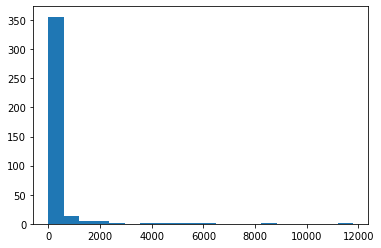

In [114]:
plt.hist(num_utts_moderate_users, bins=20) # holy shit that guy at 7500

In [115]:
import numpy as np

In [70]:
print(np.median(num_utts_antigun_users))
print(np.mean(num_utts_antigun_users))

29.5
160.50442477876106


In [71]:
print(np.median(num_utts_progun_users))
print(np.mean(num_utts_progun_users))

12.0
357.6051948051948


To normalize, we take up to 5 utterances per user. If the user has <= 5 utterances, take all of them.

In [18]:
from random import sample

In [19]:
progun_utts = []
for user in progun_users:
    user_utts = list(user.iter_utterances())
    if len(user_utts) <= 5:
        progun_utts.extend(user_utts)
    else:
        progun_utts.extend(sample(user_utts, 5))

In [20]:
antigun_utts = []
for user in antigun_users:
    user_utts = list(user.iter_utterances())
    if len(user_utts) <= 5:
        antigun_utts.extend(user_utts)
    else:
        antigun_utts.extend(sample(user_utts, 5))

In [126]:
moderate_utts = []
for user in moderate_users:
    user_utts = list(user.iter_utterances())
    if len(user_utts) <= 5:
        moderate_utts.extend(user_utts)
    else:
        moderate_utts.extend(sample(user_utts, 5))

In [21]:
len(antigun_utts)

932

In [22]:
len(progun_utts)

1487

In [127]:
len(moderate_utts)

1607

In [23]:
[utt.text for utt in antigun_utts[:10]]

['personally, i am highly supportive of the second amendment, but one has a choice whether to carry guns on their person at a given moment while one does not have this choice when it comes to their sexuality, gender, or race. apples to oranges also i think they should be able to allow smoking so long as its clearly posted and not vented out to the side walk',
 '',
 "It depends on a number of external factors from that, but your concern does play a part. Other factors would include the type of business, the negative externalities an industry might have, a business' effects on society, etc.",
 'Maybe??',
 'you have yet to cite my specific statement. Are you afraid?',
 'Repeal the 2nd amendment. Ban all guns Seize all guns not surrendered. Is that too simple for you ?',
 'Then why are "home invaders" not charged with it in most cases ? The "new laws" would be to establish "Home Invasion" as a crime.',
 'BAN ALL GUNS Make exceptions for muzzle loaders, bolt action and maybe single and doub

In [24]:
[utt.text for utt in progun_utts[:10]]

["your stupid question is not relevant to the USA. Mine is. we have increased guns massively, both in people carrying them and the numbers owned and yet our violent crime rate is going down. that sort of bitch slaps all the bannerrhoid propaganda we hear from Democrats and the media how more guns equals more violence. It doesn't.",
 'many makers either supply a military surplus mag while more and more are using Magpuls. Italian Made Mec-gar mags are often OEM for many guns and as good or better than others OEMs. I use MGs exclusively in my CZ 75s since the springs on them are better than the factory original and they are cheaper. Now on my race guns (Also CZ) I use CZ factory TS mags but with CZ Custom (Aftermarket) extensions and springs. These are designed for pro level world class shooting',
 'you have not demonstrated you have any discernible knowledge in ANY topic that is relevant to this discussion. calling LEGAL gun ownership a public health crisis is just plain silly',
 '1) why

In [25]:
def clean_text(txt):
    return txt.replace("\n", " ").replace('\x92', "'")

In [26]:
progun_text = ''
for utt in progun_utts:
    if len(utt.text) >= 25:
        if utt.text.endswith('.'):
            progun_text += clean_text(utt.text) + ' '
        else:
            progun_text += clean_text(utt.text) + '. '

In [27]:
antigun_text = ''
for utt in antigun_utts:
    if len(utt.text) >= 25:
        if utt.text.endswith('.'):
            antigun_text += clean_text(utt.text) + ' '
        else:
            antigun_text += clean_text(utt.text) + '. '

In [134]:
moderate_text = ''
for utt in moderate_utts:
    if len(utt.text) >= 25:
        if utt.text.endswith('.'):
            moderate_text += clean_text(utt.text) + ' '
        else:
            moderate_text += clean_text(utt.text) + '. '

In [28]:
from random import sample
all_text = ''
for user in forum_corpus.iter_users():
    user_utts = list(user.iter_utterances())
    user_utts = [utt for utt in user_utts if len(utt.text) >= 25]
    if len(user_utts) >= 3:
        selected_utts = sample(user_utts, 3)
    else:
        selected_utts = user_utts
    
    for utt in selected_utts:
        if utt.text.endswith('.'):
            all_text += clean_text(utt.text) + ' '
        else:
            all_text += clean_text(utt.text) + '. '

In [29]:
len(progun_text)

570464

In [30]:
len(antigun_text)

365536

In [31]:
len(moderate_text)

NameError: name 'moderate_text' is not defined

In [32]:
from nltk import sent_tokenize

In [33]:
with open('progun_forum_corpus_full.txt', 'w') as f:
    for sentence in sent_tokenize(progun_text):
        if len(sentence) > 5:
            f.write(sentence)
            f.write("\n")

In [34]:
with open('antigun_forum_corpus_full.txt', 'w') as f:
    for sentence in sent_tokenize(antigun_text):
        if len(sentence) > 5:
            f.write(sentence)
            f.write("\n")

In [147]:
with open('moderate_forum_corpus_full.txt', 'w') as f:
    for sentence in sent_tokenize(moderate_text):
        if len(sentence) > 5:
            f.write(sentence)
            f.write("\n")

In [35]:
with open('whole_forum_corpus_full.txt', 'w') as f:
    for sentence in sent_tokenize(all_text):
        if len(sentence) > 5:
            f.write(sentence)
            f.write("\n")

## Training step

In [61]:
lm = LanguageModel(SRILM_path='/Users/calebchiam/Documents/GitHub/cs6742-fork/convokit/SRILM/srilm-1.7.3',
                  working_dir='/Users/calebchiam/Documents/GitHub/cs6742-fork/convokit/SRILM/dump/',
                  lm_output_path='whole_forum_full.lm',
                  lm_type='laplace',
                  count_output_path='whole_forum_counts.txt',
                  order=2,
                  verbose=True)

In [62]:
lm.train('whole_forum_corpus_full.txt')

In [54]:
lm = LanguageModel(SRILM_path='/Users/calebchiam/Documents/GitHub/cs6742-fork/convokit/SRILM/srilm-1.7.3',
                  working_dir='/Users/calebchiam/Documents/GitHub/cs6742-fork/convokit/SRILM/dump/',
                  lm_output_path='progun_forum_full.lm',
                  lm_type='laplace',
                  count_output_path='progun_forum_counts.txt',
                  order=2,
                  verbose=True)

In [55]:
lm.train('progun_forum_corpus_full.txt')

In [56]:
lm.str_perplexity("I love guns and guns.")

/Users/calebchiam/Documents/GitHub/cs6742-fork/convokit/SRILM/dump/progun_forum_full.lm: line 1373: warning: non-zero probability for <unk> in closed-vocabulary LM
file /Users/calebchiam/Documents/GitHub/cs6742-fork/convokit/SRILM/dump/temp/493957586420138824.txt: 1 sentences, 5 words, 0 OOVs
0 zeroprobs, logprob= -16.68756 ppl= 604.3092 ppl1= 2175.259


604.3092

In [57]:
lm.str_perplexity("I love muffins and muffins.")

/Users/calebchiam/Documents/GitHub/cs6742-fork/convokit/SRILM/dump/progun_forum_full.lm: line 1373: warning: non-zero probability for <unk> in closed-vocabulary LM
file /Users/calebchiam/Documents/GitHub/cs6742-fork/convokit/SRILM/dump/temp/8332283749400076066.txt: 1 sentences, 5 words, 0 OOVs
0 zeroprobs, logprob= -17.81153 ppl= 930.2249 ppl1= 3650.107


930.2249

In [58]:
lm.str_perplexity("I hate guns.")

/Users/calebchiam/Documents/GitHub/cs6742-fork/convokit/SRILM/dump/progun_forum_full.lm: line 1373: warning: non-zero probability for <unk> in closed-vocabulary LM
file /Users/calebchiam/Documents/GitHub/cs6742-fork/convokit/SRILM/dump/temp/2199159746890547450.txt: 1 sentences, 3 words, 0 OOVs
0 zeroprobs, logprob= -11.36669 ppl= 694.5021 ppl1= 6150.326


694.5021

In [59]:
lm.str_perplexity("We ought to have a right to arm ourselves.")

/Users/calebchiam/Documents/GitHub/cs6742-fork/convokit/SRILM/dump/progun_forum_full.lm: line 1373: warning: non-zero probability for <unk> in closed-vocabulary LM
file /Users/calebchiam/Documents/GitHub/cs6742-fork/convokit/SRILM/dump/temp/7976965727151651160.txt: 1 sentences, 9 words, 0 OOVs
0 zeroprobs, logprob= -31.999 ppl= 1584.53 ppl1= 3592.898


1584.53

In [60]:
lm.str_perplexity("We ought not have a right to arm ourselves.")

/Users/calebchiam/Documents/GitHub/cs6742-fork/convokit/SRILM/dump/progun_forum_full.lm: line 1373: warning: non-zero probability for <unk> in closed-vocabulary LM
file /Users/calebchiam/Documents/GitHub/cs6742-fork/convokit/SRILM/dump/temp/6923359597537417205.txt: 1 sentences, 9 words, 0 OOVs
0 zeroprobs, logprob= -32.51303 ppl= 1783.623 ppl1= 4097.878


1783.623

In [63]:
lm2 = LanguageModel(SRILM_path='/Users/calebchiam/Documents/GitHub/cs6742-fork/convokit/SRILM/srilm-1.7.3',
                  working_dir='/Users/calebchiam/Documents/GitHub/cs6742-fork/convokit/SRILM/dump/',
                  lm_output_path='antigun_forum_full.lm',
                  lm_type='laplace',
                  count_output_path='antigun_forum_counts.txt',
                  order=2,
                  verbose=False)

In [64]:
lm2.train('antigun_forum_corpus_full.txt')

In [65]:
lm2.str_perplexity("I love guns.")

532.3662

In [66]:
lm2.str_perplexity("I hate guns.")

453.1557

In [67]:
lm2.str_perplexity("We ought to have a right to arm ourselves.")

812.1554

In [68]:
lm2.str_perplexity("We ought not have a right to arm ourselves.")

1002.714